In [1]:
import copy
import cv2
import PIL.Image as pilimg
import numpy as np
from matplotlib.pyplot import imshow
from xml.etree import ElementTree as ET

- Data References: https://data.mendeley.com/datasets/9rcv8mm682/2

(415, 416, 3)


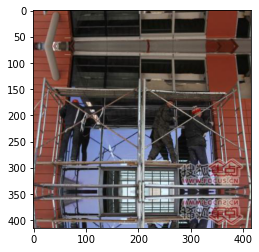

In [2]:
img_path = './img/hard_hat_workers12.png'

# Read image
img = pilimg.open(img_path)
img = np.array(img)
print(img.shape)

imshow(img)

In [3]:
label_path = './label/hard_hat_workers12.xml'

# XML parsing
tree = ET.parse(label_path)
root = tree.getroot()

class_list = []
box_list = []

for child in root:
    if child.tag == 'object':
        name = child[0].text

        if name == 'helmet':
            continue
        elif name == 'face':
            continue
        elif name == 'person_with_helmet':
            name = 'person with safety helmet'
        elif name == 'person_no_helmet':
            name = 'person'
        elif name == 'head_with_helmet':
            name = 'head with safety helmet'
        elif name == 'head_no_helmet':
            name = 'head'

        bndbox = child[4]
        x1 = int(bndbox[0].text)
        y1 = int(bndbox[1].text)
        x2 = int(bndbox[2].text)
        y2 = int(bndbox[3].text)

        class_list.append(name)
        box_list.append([x1, y1, x2, y2])

- Set Detecting Area

In [4]:
area = [[180, 225], [200, 150], [350, 150], [370, 225], [350, 300], [200, 300]]
layer_color = (1, 0, 0) # Black
vis_color = (255, 0, 0) # REd

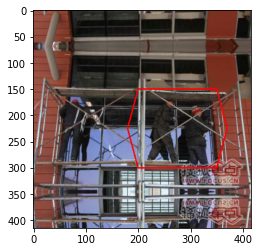

In [5]:
# Visualization of detecting area
vis_detecting_area = cv2.polylines(copy.deepcopy(img), [np.array(area, np.int32)], True, color=vis_color, thickness=2)
imshow(vis_detecting_area)

In [6]:
# layer of detecting area
detecting_area_layer = np.zeros_like(img)
detecting_area_layer = cv2.fillPoly(detecting_area_layer, [np.array(area, np.int32)], color=layer_color)

- Invasion Detection

In [7]:
# Thr of rate of overlapping person bounding box with detecting area 
detection_thr = 0.9

In [8]:
# Draw bounding box
def draw_box(img, color, x1, y1, x2, y2, thickness=2):
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
    
    return img

In [9]:
for class_name, box in zip(class_list, box_list):
    
    if class_name == 'person' or class_name == 'person with safety helmet':
        
        print('box:', box)

        box_layer = np.zeros_like(img)
        
        left_top = (np.clip(int(box[0]), 0, img.shape[1] - 1), np.clip(int(box[1]), 0, img.shape[0] - 1))
        right_bottom = (np.clip(int(box[2]), 0, img.shape[1] - 1), np.clip(int(box[3]), 0, img.shape[0] - 1))

        left_bot = ((np.clip(int(box[0]), 0, img.shape[1] - 1), np.clip(int(box[3]), 0, img.shape[0] - 1)))
        right_top = (np.clip(int(box[2]), 0, img.shape[1] - 1), np.clip(int(box[1]), 0, img.shape[0] - 1))
    
        box_layer = cv2.fillPoly(box_layer, [np.array([left_top, right_bottom, left_bot, right_top])], color=layer_color)
        
        # Checking rate of overlapping of person bounding box with detecting area 
        if np.sum(detecting_area_layer * box_layer) > ((np.sum(box_layer)) * detection_thr):
            print('Invasion!')
            color = (255, 0, 0) # Red
        else:
            print('Safe!')
            color = (0, 255, 0) # Green

        draw_box(vis_detecting_area, color, box[0], box[1], box[2], box[3])

box: [288, 181, 345, 293]
Invasion!
box: [216, 169, 278, 287]
Invasion!
box: [44, 169, 95, 288]
Safe!


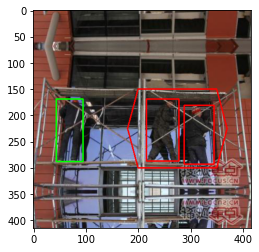

In [10]:
imshow(vis_detecting_area)